## Data 601:  Project #1

 ## Project Proposal

Describe how the data source was discovered:
For this project, I asked the professor to help find some data sources.
From those data sources, I chose to work on this one, as it’s the one close to my future goal, which is to be working for health care.
Link: https://catalog.data.gov/dataset/accidental-drug-related-deaths-january-2012-sept-2015

Data is free to download?  Yes

Data is legal to access?   Yes

Although the data is from government sources (State of Connecticut, data.ct.gov), It’s a Non-Federal dataset.
Public: This dataset is intended for public access and use.

Documented Exploratory Data Analysis is not available for the data: 
I didn’t find any data analysis of this data set. I have to say I didn’t really know how to check for it. I just googled it and open multiple links to see if they were about Analyzing this data.
 
Project proposal include size of data (rows, columns, megabytes):
Rows: 5,105
Columns: 41
1,765 KB

Project proposal relevant to Data 601 objectives:
Yes, the project proposal is relevant for Data 601. With this data set, I will be doing characterization, tracking for example, with types of drugs are the most found in the people blood after their death, and that could help in larger dynamic to prevent the use of those drugs.  I will be able to transform data into useful information.  And visualization by producing graphs to show the trend of each drug.

Does student understand the stories in the data?
The data is about a listing of each accidental death associated with drug overdose in Connecticut from 2012 to 2018. A "Y" value under the different substance columns indicates which drug was detected.

Data size: 1,765 KB

### Primary Observation about this data:
The data is about each accidental death associated with drug overdose in Connecticut from 2012 to 2018. 
The "Y" value under the different columns indicates that particular substance was detected.

From the visualization of data, the main drugs find in the blood of victims are Fentanyl, Heroin, Any opioid,
followed by cocaine and Ethanol. Age doesn't seem to be a limitation, victims' ages are between 14 and 90 years old. 

Gender is instead very significant as the victims are mostly men.

In [1]:
import pandas
print('pandas',pandas.__version__)
import numpy as np
import pandas as pd
import csv
import time
import re
import math
import matplotlib.pyplot as plt
import seaborn as sns

pandas 0.24.2


#https://catalog.data.gov/dataset/accidental-drug-related-deaths-january-2012-sept-2015

In [2]:
# To see how long it takes to read the file.

start_time = time.time()

df = pandas.read_csv('https://data.ct.gov/api/views/rybz-nyjw/rows.csv?accessType=DOWNLOAD') # read the file
print('Elapsed time:', round(time.time() - start_time, 2), 'seconds')

df.shape

Elapsed time: 1.22 seconds


(5105, 41)

In [3]:
df.sample(5)

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
3036,17-0694,08/20/2017 12:00:00 AM,DateReported,51.0,Male,"Hispanic, White",HARTFORD,HARTFORD,CT,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Hartford, CT\n(41.765775, -72.673356)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)"
377,17-0312,04/17/2017 12:00:00 AM,DateReported,60.0,Female,White,NEW LONDON,NEW LONDON,CT,NEW LONDON,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"New London, CT\n(41.355167, -72.099561)","NEW LONDON, CT\n(41.355167, -72.099561)","NEW LONDON, CT\n(41.355167, -72.099561)"
4321,12-0066,03/10/2012 12:00:00 AM,DateofDeath,50.0,Male,White,PLAINVILLE,HARTFORD,NaN,PLAINVILLE,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"PLAINVILLE, CT\n(41.674474, -72.85835)","PLAINVILLE, CT\n(41.674474, -72.85835)","CT\n(41.575155, -72.738288)"
2669,18-0671,08/27/2018 12:00:00 AM,DateofDeath,28.0,Male,White,NORWICH,NEW LONDON,CT,NORWICH,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"NORWICH, CT\n(41.524304, -72.075821)","NORWICH, CT\n(41.524304, -72.075821)","NORWICH, CT\n(41.524304, -72.075821)"
3331,17-1009,12/25/2017 12:00:00 AM,DateReported,43.0,Male,White,BRIDGEPORT,FAIRFIELD,CT,BRIDGEPORT,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Bridgeport, CT\n(41.179195, -73.189476)","BRIDGEPORT, CT\n(41.179195, -73.189476)","BRIDGEPORT, CT\n(41.179195, -73.189476)"


In [4]:
df.tail()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
5100,15-0466,09/08/2015 12:00:00 AM,DateReported,43.0,Male,White,CHESHIRE,NEW HAVEN,CT,CHESHIRE,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CHESHIRE, CT\n(41.498834, -72.901448)","CHESHIRE, CT\n(41.498834, -72.901448)","CT\n(41.575155, -72.738288)"
5101,17-0618,07/22/2017 12:00:00 AM,DateReported,21.0,Male,White,MADISON,NEW HAVEN,CT,NEW HAVEN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"New Haven, CT\n(41.308252, -72.924161)","MADISON, CT\n(41.271447, -72.60086)","CT\n(41.575155, -72.738288)"
5102,18-0646,08/14/2018 12:00:00 AM,DateofDeath,30.0,Male,White,LAWRENCEVILLE,TIOGA,PA,DANBURY,...,Y,NaN,NaN,NaN,NaN,Y,Accident,"DANBURY, CT\n(41.393666, -73.451539)",NaN,"DANBURY, CT\n(41.393666, -73.451539)"
5103,14-0124,03/16/2014 12:00:00 AM,DateofDeath,33.0,Male,White,HARTFORD,NaN,NaN,WINDSOR,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"WINDSOR, CT\n(41.852781, -72.64379)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)"
5104,16-0637,09/15/2016 12:00:00 AM,DateofDeath,33.0,Male,White,THOMASTON,LITCHFIELD,CT,WATERBURY,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"WATERBURY, CT\n(41.554261, -73.043069)","THOMASTON, CT\n(41.674124, -73.073189)","WATERBURY, CT, CT\n(41.554261, -73.043069)"


In [5]:
# Different ID present in the dataframe.
df ['ID']

In [6]:
#df.info()

In [7]:
#df.dtypes

In [8]:
# I use describe to view some basic statistical details from numerical columns.
df.describe()

,Age
count,5102.000000
mean,41.964916
std,12.336639
min,14.000000
25%,32.000000
50%,42.000000
75%,52.000000
max,87.000000


In [9]:
#Count the number of male and female.
df['Sex'].value_counts()

Male       3773
Female     1325
Unknown       1
Name: Sex, dtype: int64

### These columns:
-DeathCityGeo
-ResidenceCityGeo
-InjuryCityGeo,
have 3 or 4 entries in each cell: city, state, latitude and longitude.
I will separate the data into multiple columns.

To solve the problem of different entries, I will write a function that takes a conditional action bases on the list lenght

Because the strings in the columns have different types of delimiters , we replaced them with the comma.

### Create new columns from DeathCityGeo

In [10]:
# https://stackoverflow.com/a/53666187/1164295
# https://stackoverflow.com/a/4998688/1164295

def deathgeo_new_cols(x):
    x=x.replace('(','').replace(')','')
    entry_as_list = re.split(';|,|\n',x)
    #print(entry_as_list)
    if len(entry_as_list)==4:
        return pd.Series(entry_as_list)
    elif len(entry_as_list)==3:
        return pd.Series([np.nan, entry_as_list[0], entry_as_list[1],
entry_as_list[2]])
    else:
        raise Exception('found list of wrong size')

df[['DeathCityGeo_city', 'DeathCityGeo_state', 'DeathCityGeo_lat', 'DeathCityGeo_long']] = df['DeathCityGeo'].apply(deathgeo_new_cols)

In [11]:
#df.head()

### Create new columns from ResidenceCityGeo

In [12]:
df['ResidenceCityGeo'].head()

0                CT\n(41.575155, -72.738288)
1        NORWALK, CT\n(41.11805, -73.412906)
2    SANDY HOOK, CT\n(41.419998, -73.282501)
3                                        NaN
4                                        NaN
Name: ResidenceCityGeo, dtype: object

In [13]:
def residencegeo_new_cols(x):
    x=x.replace('(','').replace(')','')
    entry_as_list = re.split(';|,|\n',x)
    if len(entry_as_list)==4:
        return pd.Series(entry_as_list)
    elif len(entry_as_list)==3:
        return pd.Series([np.nan, entry_as_list[0], entry_as_list[1],
entry_as_list[2]])
    else:
        raise Exception('found list of wrong size')

df[['ResidenceCityGeo_city', 'ResidenceCityGeo_state', 'ResidenceCityGeo_lat', 'ResidenceCityGeo_long']] = df['DeathCityGeo'].apply(residencegeo_new_cols)


### Create new columns from InjuryCityGeo

In [14]:
df['InjuryCityGeo'].tail()

5100                   CT\n(41.575155, -72.738288)
5101                   CT\n(41.575155, -72.738288)
5102          DANBURY, CT\n(41.393666, -73.451539)
5103                   CT\n(41.575155, -72.738288)
5104    WATERBURY, CT, CT\n(41.554261, -73.043069)
Name: InjuryCityGeo, dtype: object

In [15]:
def injurygeo_new_cols(x):
    x=x.replace('(','').replace(')','')
    entry_as_list = re.split(';|,|\n',x)
    if len(entry_as_list)==4:
        return pd.Series(entry_as_list)
    elif len(entry_as_list)==3:
        return pd.Series([np.nan, entry_as_list[0], entry_as_list[1],
entry_as_list[2]])
    else:
        raise Exception('found list of wrong size')

df[['InjuryCityGeo_city', 'InjuryCityGeo_state', 'InjuryCityGeo_lat', 'InjuryCityGeo_long']] = df['DeathCityGeo'].apply(injurygeo_new_cols)


### Dataframe after adding new columns

In [16]:
df.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,DeathCityGeo_lat,DeathCityGeo_long,ResidenceCityGeo_city,ResidenceCityGeo_state,ResidenceCityGeo_lat,ResidenceCityGeo_long,InjuryCityGeo_city,InjuryCityGeo_state,InjuryCityGeo_lat,InjuryCityGeo_long
0,14-0273,06/28/2014 12:00:00 AM,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.575155,-72.738288,NaN,CT,41.575155,-72.738288,NaN,CT,41.575155,-72.738288
1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,41.11805,-73.412906,Norwalk,CT,41.11805,-73.412906,Norwalk,CT,41.11805,-73.412906
2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,41.393666,-73.451539,Danbury,CT,41.393666,-73.451539,Danbury,CT,41.393666,-73.451539
3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,41.026526,-73.628549,Greenwich,CT,41.026526,-73.628549,Greenwich,CT,41.026526,-73.628549
4,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,41.026526,-73.628549,Greenwich,CT,41.026526,-73.628549,Greenwich,CT,41.026526,-73.628549


In [17]:
df.columns

Index(['ID', 'Date', 'DateType', 'Age', 'Sex', 'Race', 'ResidenceCity',
       'ResidenceCounty', 'ResidenceState', 'DeathCity', 'DeathCounty',
       'Location', 'LocationifOther', 'DescriptionofInjury', 'InjuryPlace',
       'InjuryCity', 'InjuryCounty', 'InjuryState', 'COD', 'OtherSignifican',
       'Heroin', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone',
       'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
       'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone', 'Other',
       'OpiateNOS', 'AnyOpioid', 'MannerofDeath', 'DeathCityGeo',
       'ResidenceCityGeo', 'InjuryCityGeo', 'DeathCityGeo_city',
       'DeathCityGeo_state', 'DeathCityGeo_lat', 'DeathCityGeo_long',
       'ResidenceCityGeo_city', 'ResidenceCityGeo_state',
       'ResidenceCityGeo_lat', 'ResidenceCityGeo_long', 'InjuryCityGeo_city',
       'InjuryCityGeo_state', 'InjuryCityGeo_lat', 'InjuryCityGeo_long'],
      dtype='object')

In [18]:
# Find the number of rows and columns in the new dataframe
df.shape

(5105, 53)

In [19]:
### As some columns represent just the type of drugs, I will melt them into one unique column, and their values in another column.

In [20]:
df_long = pd.melt( df, 
                   id_vars=['ID', 'Date', 'DateType', 'Age', 'Sex', 'Race', 'ResidenceCity',
       'ResidenceCounty', 'ResidenceState', 'DeathCity', 'DeathCounty',
       'Location', 'LocationifOther', 'DescriptionofInjury', 'InjuryPlace',
       'InjuryCity', 'InjuryCounty', 'InjuryState', 'COD', 'OtherSignifican','MannerofDeath', 'DeathCityGeo',
       'ResidenceCityGeo', 'InjuryCityGeo', 'DeathCityGeo_city',
       'DeathCityGeo_state', 'DeathCityGeo_lat', 'DeathCityGeo_long',
       'ResidenceCityGeo_city', 'ResidenceCityGeo_state',
       'ResidenceCityGeo_lat', 'ResidenceCityGeo_long', 'InjuryCityGeo_city',
       'InjuryCityGeo_state', 'InjuryCityGeo_lat', 'InjuryCityGeo_long'],
                   var_name='TypeOfDrugs',
                   value_name= 'Detected'
                  )

In [21]:
# Find the number of rows and columns after "melt"
df_long.shape

(86785, 38)

In [22]:
df_long.sample(10)

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,ResidenceCityGeo_city,ResidenceCityGeo_state,ResidenceCityGeo_lat,ResidenceCityGeo_long,InjuryCityGeo_city,InjuryCityGeo_state,InjuryCityGeo_lat,InjuryCityGeo_long,TypeOfDrugs,Detected
62675,12-0323,12/04/2012 12:00:00 AM,DateofDeath,54.0,Male,White,ENFIELD,HARTFORD,NaN,ENFIELD,...,ENFIELD,CT,41.976501,-72.591985,ENFIELD,CT,41.976501,-72.591985,Morphine_NotHeroin,NaN
58720,17-0264,03/30/2017 12:00:00 AM,DateReported,29.0,Male,White,ORANGE,NEW HAVEN,CT,ORANGE,...,Orange,CT,41.282731,-73.028426,Orange,CT,41.282731,-73.028426,Tramad,NaN
71226,18-0319,04/28/2018 12:00:00 AM,DateReported,44.0,Male,White,NEW HAVEN,NEW HAVEN,CT,NEW HAVEN,...,New Haven,CT,41.308252,-72.924161,New Haven,CT,41.308252,-72.924161,Hydromorphone,NaN
9236,15-0171,04/07/2015 12:00:00 AM,DateReported,66.0,Female,White,DERBY,NEW HAVEN,CT,DERBY,...,Derby,CT,41.322959,-73.089594,Derby,CT,41.322959,-73.089594,Cocaine,NaN
34704,15-0430,08/19/2015 12:00:00 AM,DateReported,33.0,Male,White,HADDAM,MIDDLESEX,CT,HADDAM,...,HADDAM,CT,41.477264,-72.512292,HADDAM,CT,41.477264,-72.512292,Ethanol,Y
10274,17-0290,04/09/2017 12:00:00 AM,DateReported,34.0,Male,White,EAST HAMPTON,NaN,CT,HARTFORD,...,Hartford,CT,41.765775,-72.673356,Hartford,CT,41.765775,-72.673356,Fentanyl,Y
71663,14-0308,07/29/2014 12:00:00 AM,DateofDeath,50.0,Male,White,BERLIN,NaN,NaN,NEW BRITAIN,...,New Britain,CT,41.667528,-72.783437,New Britain,CT,41.667528,-72.783437,Other,NaN
85890,18-0523,07/03/2018 12:00:00 AM,DateofDeath,22.0,Male,White,PLYMOUTH,LITCHFIELD,CT,BRISTOL,...,BRISTOL,CT,41.673037,-72.945791,BRISTOL,CT,41.673037,-72.945791,AnyOpioid,Y
14579,18-0686,09/03/2018 12:00:00 AM,DateofDeath,47.0,Female,White,MERIDEN,NEW HAVEN,CT,MERIDEN,...,MERIDEN,CT,41.537589,-72.8011,MERIDEN,CT,41.537589,-72.8011,Fentanyl,Y
80137,18-0267,04/07/2018 12:00:00 AM,DateReported,50.0,Male,White,BRISTOL,HARTFORD,CT,BRISTOL,...,Bristol,CT,41.673037,-72.945791,Bristol,CT,41.673037,-72.945791,OpiateNOS,NaN


In [23]:
# To see the names of the columns
df_long.columns

Index(['ID', 'Date', 'DateType', 'Age', 'Sex', 'Race', 'ResidenceCity',
       'ResidenceCounty', 'ResidenceState', 'DeathCity', 'DeathCounty',
       'Location', 'LocationifOther', 'DescriptionofInjury', 'InjuryPlace',
       'InjuryCity', 'InjuryCounty', 'InjuryState', 'COD', 'OtherSignifican',
       'MannerofDeath', 'DeathCityGeo', 'ResidenceCityGeo', 'InjuryCityGeo',
       'DeathCityGeo_city', 'DeathCityGeo_state', 'DeathCityGeo_lat',
       'DeathCityGeo_long', 'ResidenceCityGeo_city', 'ResidenceCityGeo_state',
       'ResidenceCityGeo_lat', 'ResidenceCityGeo_long', 'InjuryCityGeo_city',
       'InjuryCityGeo_state', 'InjuryCityGeo_lat', 'InjuryCityGeo_long',
       'TypeOfDrugs', 'Detected'],
      dtype='object')

In [24]:
df_long = df_long.dropna(subset=['Detected'])

In [25]:
#df_long['Detected']

In [26]:
# Find the number of rows after "dropna"
df_long.shape

(13913, 38)

In [27]:
df_long['ID']

In [28]:
## To make sure I didn't lost any ID numbers when I dropped the nAn values in the 'Delected' column. I will remove all 
## the duplicate ID in the melt dataframe (df_long).

def Remove_duplicate(): 
    final_ID_list = [] 
    for num in df_long['ID']: 
        if num not in final_ID_list: 
            final_ID_list.append(num) 
    return final_ID_list 
print(len(Remove_duplicate()))

## I lost 18 IDs (5105 - 5087). I will assume that is because the persons with those ID were not tested positive to any drugs.
## As in the dataframe the age vari from 14 years to over 90 years. (it's possible that the young victims were just collateral
# effect, as they can't even drive)

5087


### Create a subset dataframe to use for visualization.

In [29]:
# https://stackoverflow.com/questions/17995024/how-to-assign-a-name-to-the-a-size-column

## For the groups to be columns again add .reset_index()
df1 = df_long.groupby(['Age','Sex','TypeOfDrugs', 'Detected']).size().to_frame('Num_Of_Victims').reset_index()


In [30]:
#print(df1)

df1.sample(10)

,Age,Sex,TypeOfDrugs,Detected,Num_Of_Victims
1661,68.0,Male,Other,MORPHINE,1
185,24.0,Male,Tramad,Y,1
609,37.0,Female,Other,BUPREN,1
323,29.0,Female,Amphet,Y,1
1295,55.0,Male,Tramad,Y,1
122,22.0,Male,Other,U-47700 synthetic opioid,1
363,30.0,Female,Fentanyl,Y,14
603,37.0,Female,Ethanol,Y,8
1632,66.0,Unknown,Oxycodone,Y,1
1065,49.0,Male,Fentanyl,Y,40


## Visualizations

### Visualization by type of drugs and number of victims for each drug.

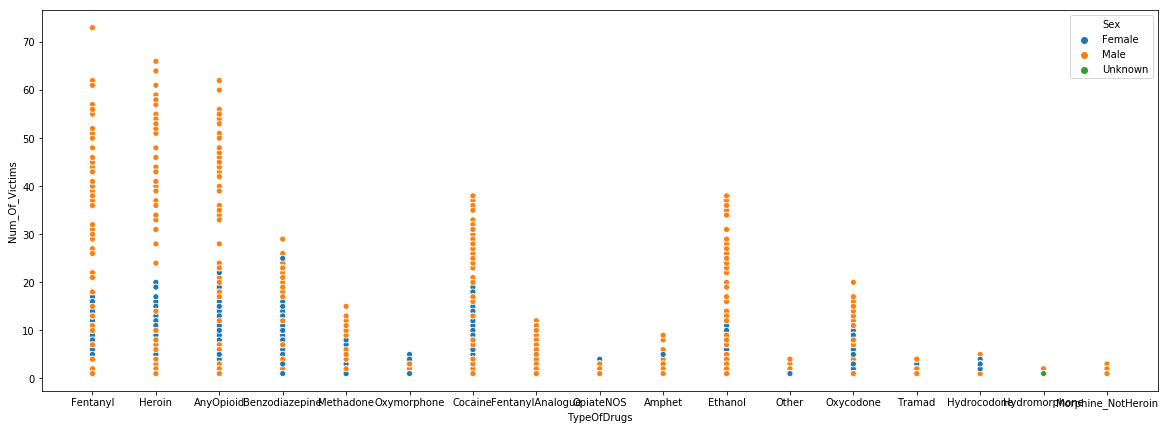

In [31]:
# Plot in base of the type of drugs and the count of people who were tested positive with each of the drugs.

#https://towardsdatascience.com/data-visualization-using-seaborn-fc24db95a850

plt.figure(figsize=(20,7))
sns.scatterplot(x="TypeOfDrugs", y="Num_Of_Victims", hue="Sex", data=df1)


### Visualization by type of drugs and age of the victims.

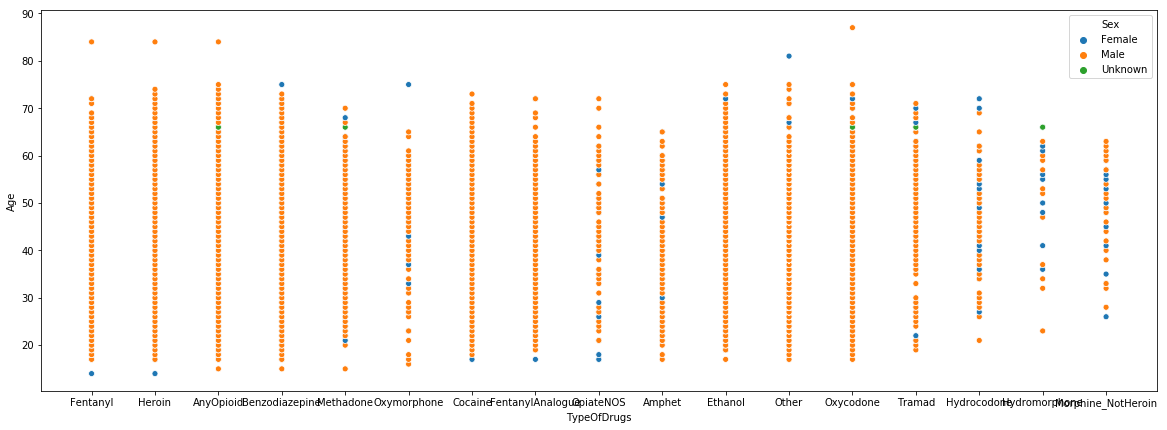

In [32]:
# Plot base on the type of drugs and the age of people test positive with each of the drugs.

plt.figure(figsize=(20,7))

sns.scatterplot(x="TypeOfDrugs", y="Age", hue="Sex",data=df1)

In [33]:
#df1 = df_long.groupby(['Age','Sex','Race','TypeOfDrugs', 'Detected']).size().to_frame('Count').reset_index()

In [34]:
#df1.sample(5)

In [35]:
#plt.figure(figsize=(20,7))

#sns.scatterplot(x="TypeOfDrugs", y="Count", hue= "Race", data=df1)

### Written story of patterns observed.
From the visualizations, we can observe that women are taking less heavy drugs.

And we have fewer females involve in drugged driving accidents than males.


## Lessons learned

I learned that among people who died in a car accident in the past years, more than 43% were tested positive for one or more drugs.
Driving under the influence of drugs can cost us our life. 
So if someone is drugged, he is better not to drive but ask for a ride.

## References:
-https://stackoverflow.com/questions/17995024/how-to-assign-a-name-to-the-a-size-column.

-https://stackoverflow.com/a/53666187/1164295

-https://stackoverflow.com/a/4998688/1164295
- Class's notes   